In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

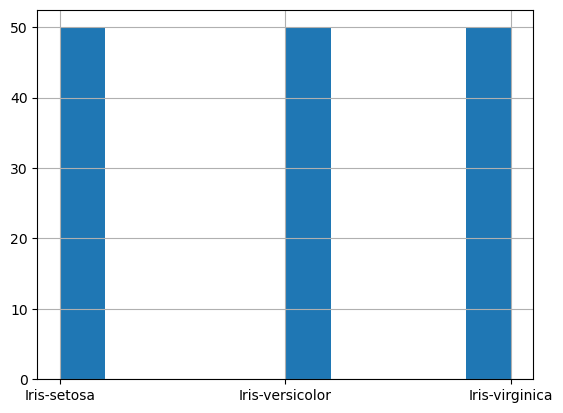

In [7]:
df["species"].hist()

<Axes: >

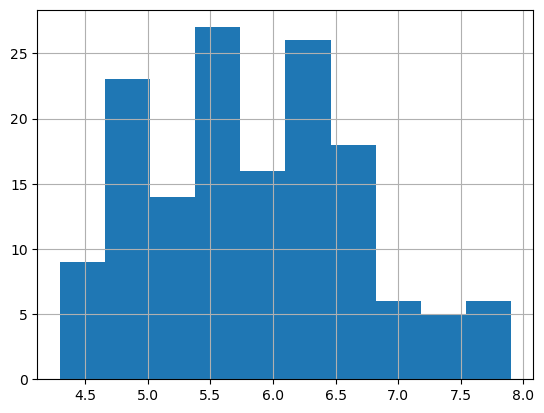

In [8]:
df["sepal_length"].hist()

<Axes: >

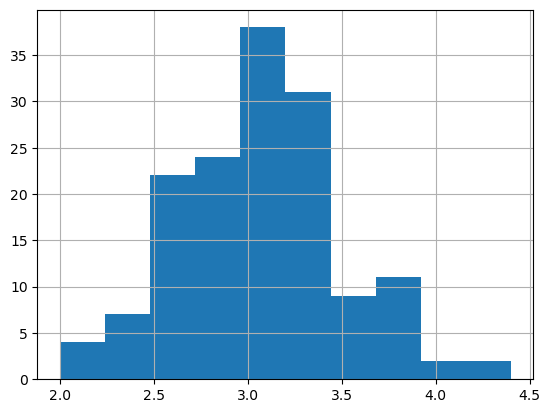

In [9]:
df["sepal_width"].hist()

<Axes: >

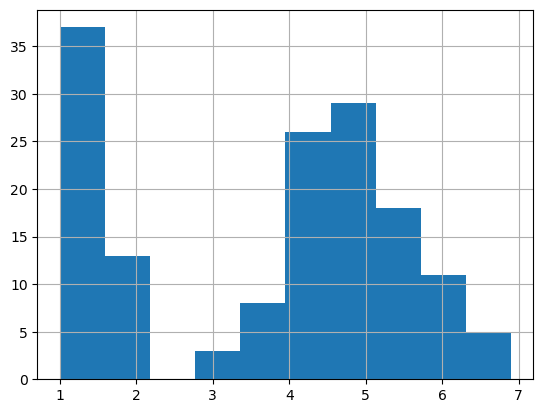

In [10]:
df["petal_length"].hist()


<Axes: >

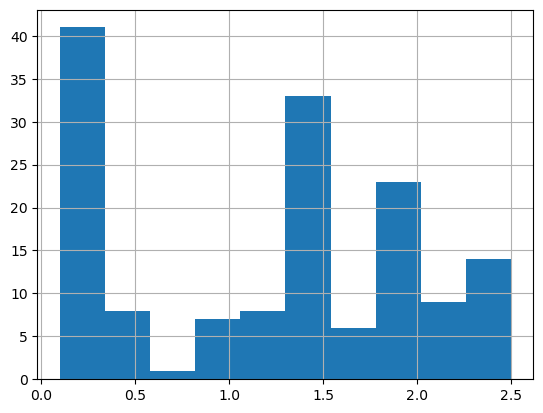

In [9]:
df["petal_width"].hist()

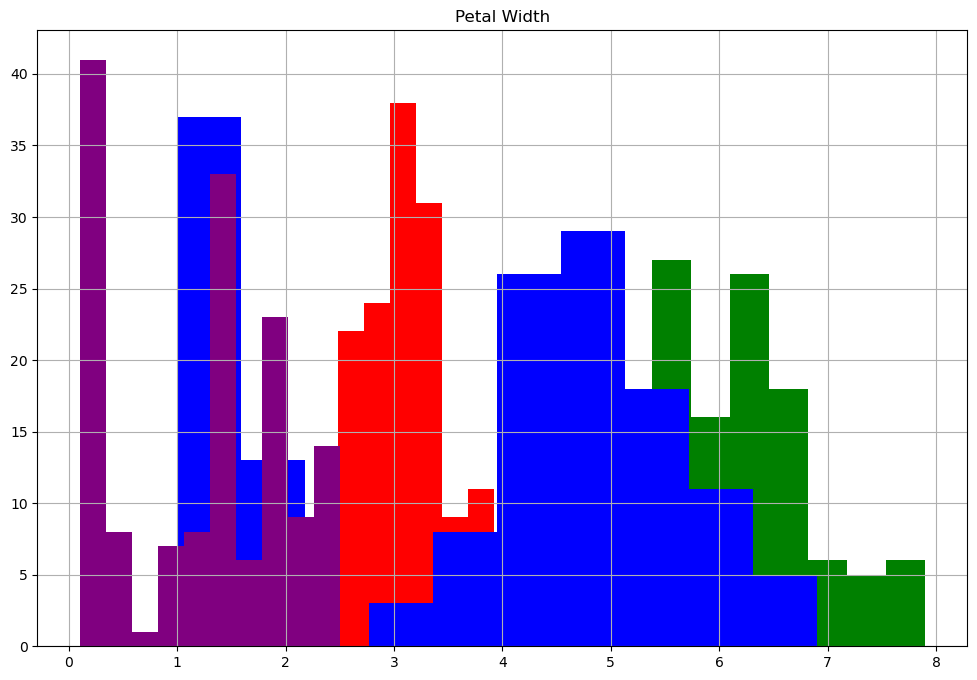

In [11]:
# Define colors for each histogram
colors = ['green', 'Red', 'Blue', 'Purple']

# Create histograms with different colors
plt.figure(figsize=(12, 8))

df["sepal_length"].hist(color=colors[0])
plt.title("Sepal Length")

df["sepal_width"].hist(color=colors[1])
plt.title("Sepal Width")

df["petal_length"].hist(color=colors[2])
plt.title("Petal Length")

df["petal_width"].hist(color=colors[3])
plt.title("Petal Width")

plt.show()

In [12]:
colors=["red","blue","green"]
species=["Iris-setosa","Iris-versicolor","Iris-virginica"]

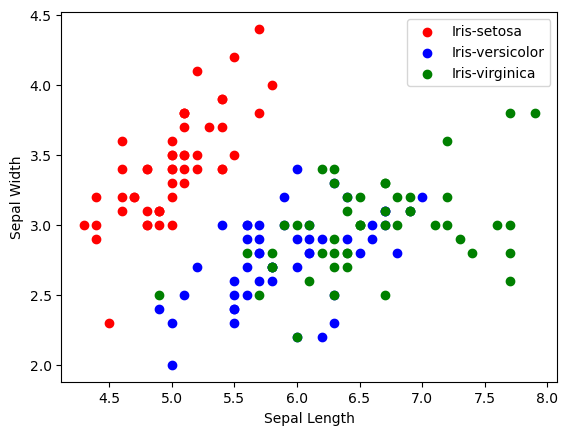

In [13]:
for i in range (3):
    x=df[df["species"]==species[i]]
    plt.scatter(x["sepal_length"],x["sepal_width"],c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

In [14]:
colors=["Orange","Darkblue","Darkgreen"]
species=["Iris-setosa","Iris-versicolor","Iris-virginica"]

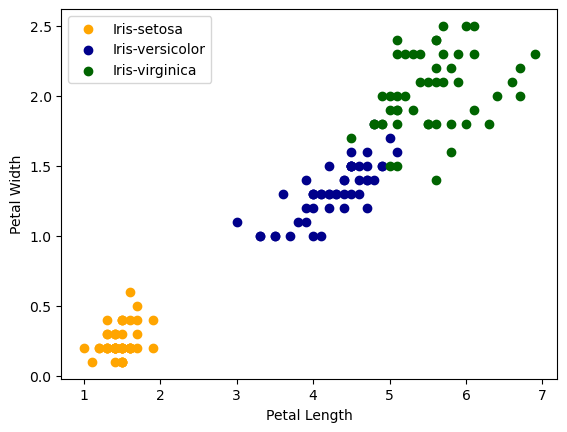

In [15]:
for i in range (3):
    x=df[df["species"]==species[i]]
    plt.scatter(x["petal_length"],x["petal_width"],c=colors[i],label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

In [16]:
colors=["#fad5d1","#5d1109","#D92916"]
species=["Iris-setosa","Iris-versicolor","Iris-virginica"]

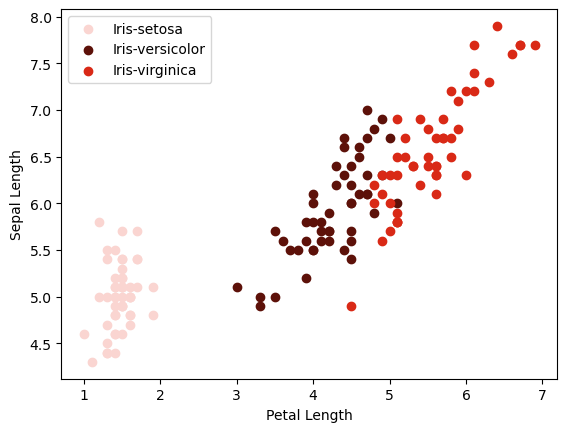

In [17]:
for i in range (3):
    x=df[df["species"]==species[i]]
    plt.scatter(x["petal_length"],x["sepal_length"],c=colors[i],label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Sepal Length")
    plt.legend()

In [18]:
colors=["Darkblue","Green","#D92916"]
species=["Iris-setosa","Iris-versicolor","Iris-virginica"]

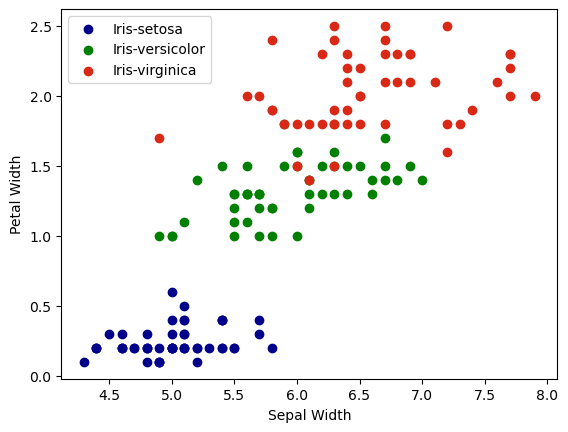

In [19]:
for i in range (3):
    x=df[df["species"]==species[i]]
    plt.scatter(x["sepal_length"],x["petal_width"],c=colors[i],label=species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.legend()

In [20]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

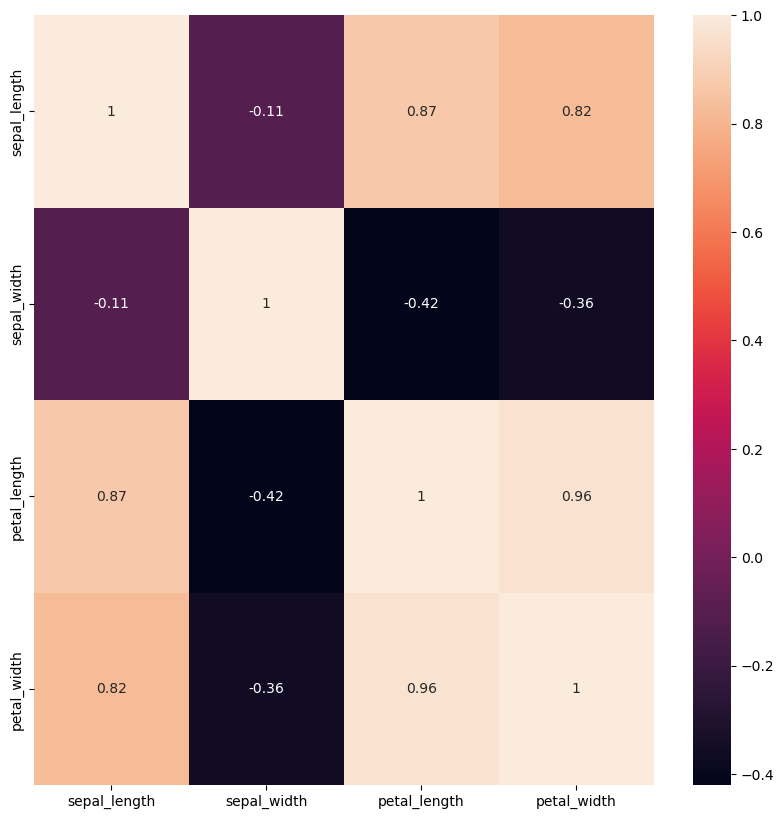

In [21]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df["species"]=le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=["species"])
Y=df["species"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [25]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [26]:
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [28]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
print("Accuracy Of DecisionTreeClassifier:",model.score(x_test,y_test)*100)

Accuracy Of DecisionTreeClassifier: 97.77777777777777


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=30)


In [32]:
model.fit(x_train, y_train)


RandomForestClassifier(random_state=30)

In [33]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556
